# Linear Regression

## 1) What is Regression?

What kind of variable is our target variable? -> Metric target variable

This weeks target variable is `count`. It is a discrete metric variable.

In a Regression, in contrast to a classification we are predicting a metric variable.

## 2) What is Linear Regression?

Linear Regression models the target variable via a linear relationship between X and y.

### 2.1) The Anscombe example

In [87]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# Inspect the data
ansc = sns.load_dataset("anscombe")
ansc.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [89]:
# How many datasets do we have
ansc['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

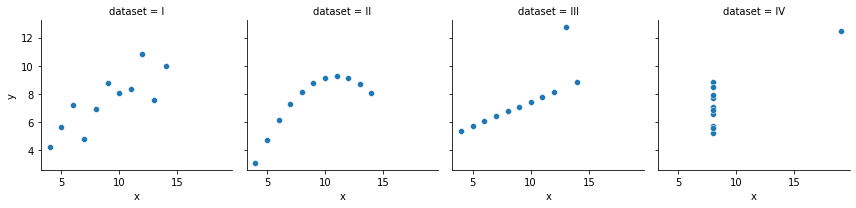

In [90]:
# Plot the datasets

plot = sns.FacetGrid(data=ansc, col='dataset')
plot.map(sns.scatterplot, 'x', 'y')
plt.show()

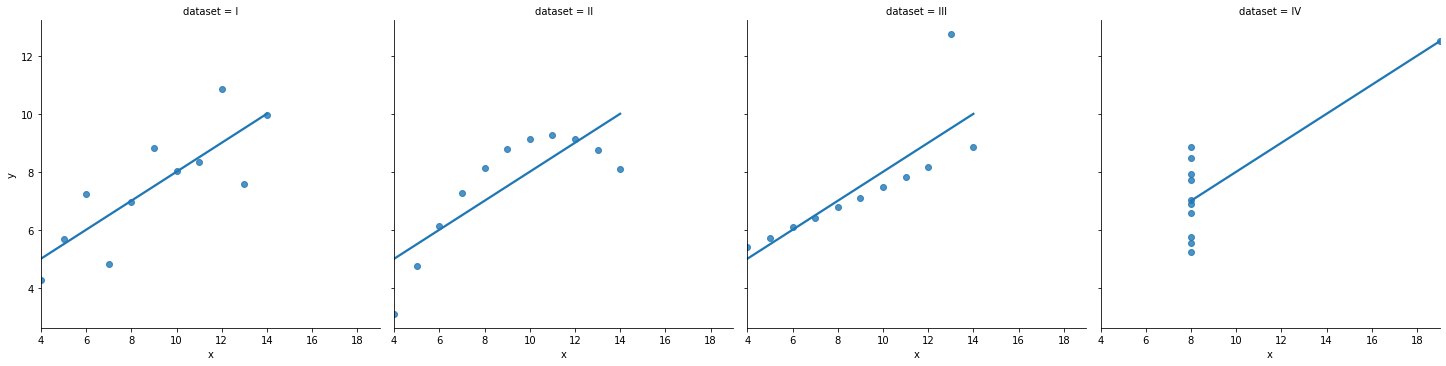

In [91]:
sns.lmplot(x='x', y='y', data=ansc, col='dataset', ci=False)

Does a linear regression make sense for all of the datasets?

I: ...

II: ...

III: ...

IV: ...

### 2.2) The formula

$$
\hat{y}_i = w_0 + w_1 * x_i
$$

where $\hat{y}$ is the models prediction of outcome y at point x.<br>
$w_0$ and $w_1$ are called coefficients. $w_0$ is the **intercept** of the line and $w_1$ is the **slope** of the line.

### 2.3) How do we determine $w_0$ and $w_1$?

#### 2.3.1) We need a loss function

The loss function of linear regression is the MSE (Mean Squared Error).

$$
MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2
$$

The task of the model is to minimize this MSE. This can be achieved in one of two ways.

#### We have to calculate/estimate the coefficients

1. Mathematically: Take the derivatives of the MSE with respect to the coefficients and set the derivatives to zero. The outcomes will be:

$$
w_0 = \overline{y} - w_1 * \overline{x}
$$

$$
w_1 = \frac{\sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n(x_i - \overline{x})^2}
$$

2. Algorithmically: You will learn about Gradient Descent tomorrow.

### 2.4) Interpretation of the parameters $w_0$ and $w_1$

$w_0$: The predicted value for y if x = 0

$w_1$: The change in the predicted value of y if we increase x by 1

### 2.5) Multiple Linear Regression

Multiple Linear Regression describes the case in which we have more than one input feature. We can have multiple ones.

With two input features for example the formula would just change to

$$
\hat{y} = w_0 + w_1 * x_1 + w_2 * x_2
$$

and we would now fit a plane (the 3D equivalent of a line) to the data.

## 3) Implementation in code

### Example: California Housing

In [92]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()

X = pd.DataFrame(california['data'], columns = california['feature_names'])
y = pd.Series(california['target'])

In [95]:
X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [97]:
y.head(2)

0    4.526
1    3.585
dtype: float64

In [98]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### Train-Test-Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### What is the target variable?

In case of the California Housing dataset it is the natural logarithm of the median house value in USD.

In case of the bike sharing data it is the variable `count`

In [101]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7151,1.7991,43.0,4.332613,1.019438,1687.0,3.643629,34.03,-118.15
10511,6.0868,17.0,6.293383,0.971286,2396.0,2.991261,33.53,-117.69
17312,2.4583,35.0,5.782201,1.295082,1168.0,2.735363,34.77,-119.72
15301,2.8893,39.0,5.019481,0.944805,833.0,2.704545,33.18,-117.36
6296,3.2799,17.0,4.860049,1.126119,4349.0,3.538649,34.02,-117.91


In [102]:
y_train.name = 'target'

In [103]:
# Plot the target variable against the features
df_train = X_train.merge(y_train, left_index=True, right_index=True)
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
7151,1.7991,43.0,4.332613,1.019438,1687.0,3.643629,34.03,-118.15,1.588
10511,6.0868,17.0,6.293383,0.971286,2396.0,2.991261,33.53,-117.69,2.829
17312,2.4583,35.0,5.782201,1.295082,1168.0,2.735363,34.77,-119.72,0.621
15301,2.8893,39.0,5.019481,0.944805,833.0,2.704545,33.18,-117.36,1.854
6296,3.2799,17.0,4.860049,1.126119,4349.0,3.538649,34.02,-117.91,1.993


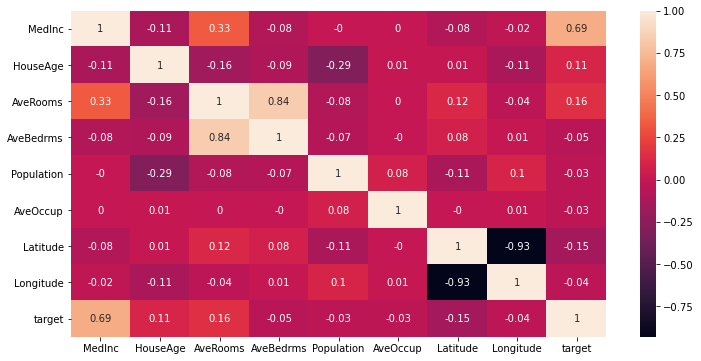

In [104]:
# We could look at the correlation
plt.rcParams['figure.figsize'] = (12,6)

sns.heatmap(round(df_train.corr(), 2), annot=True)

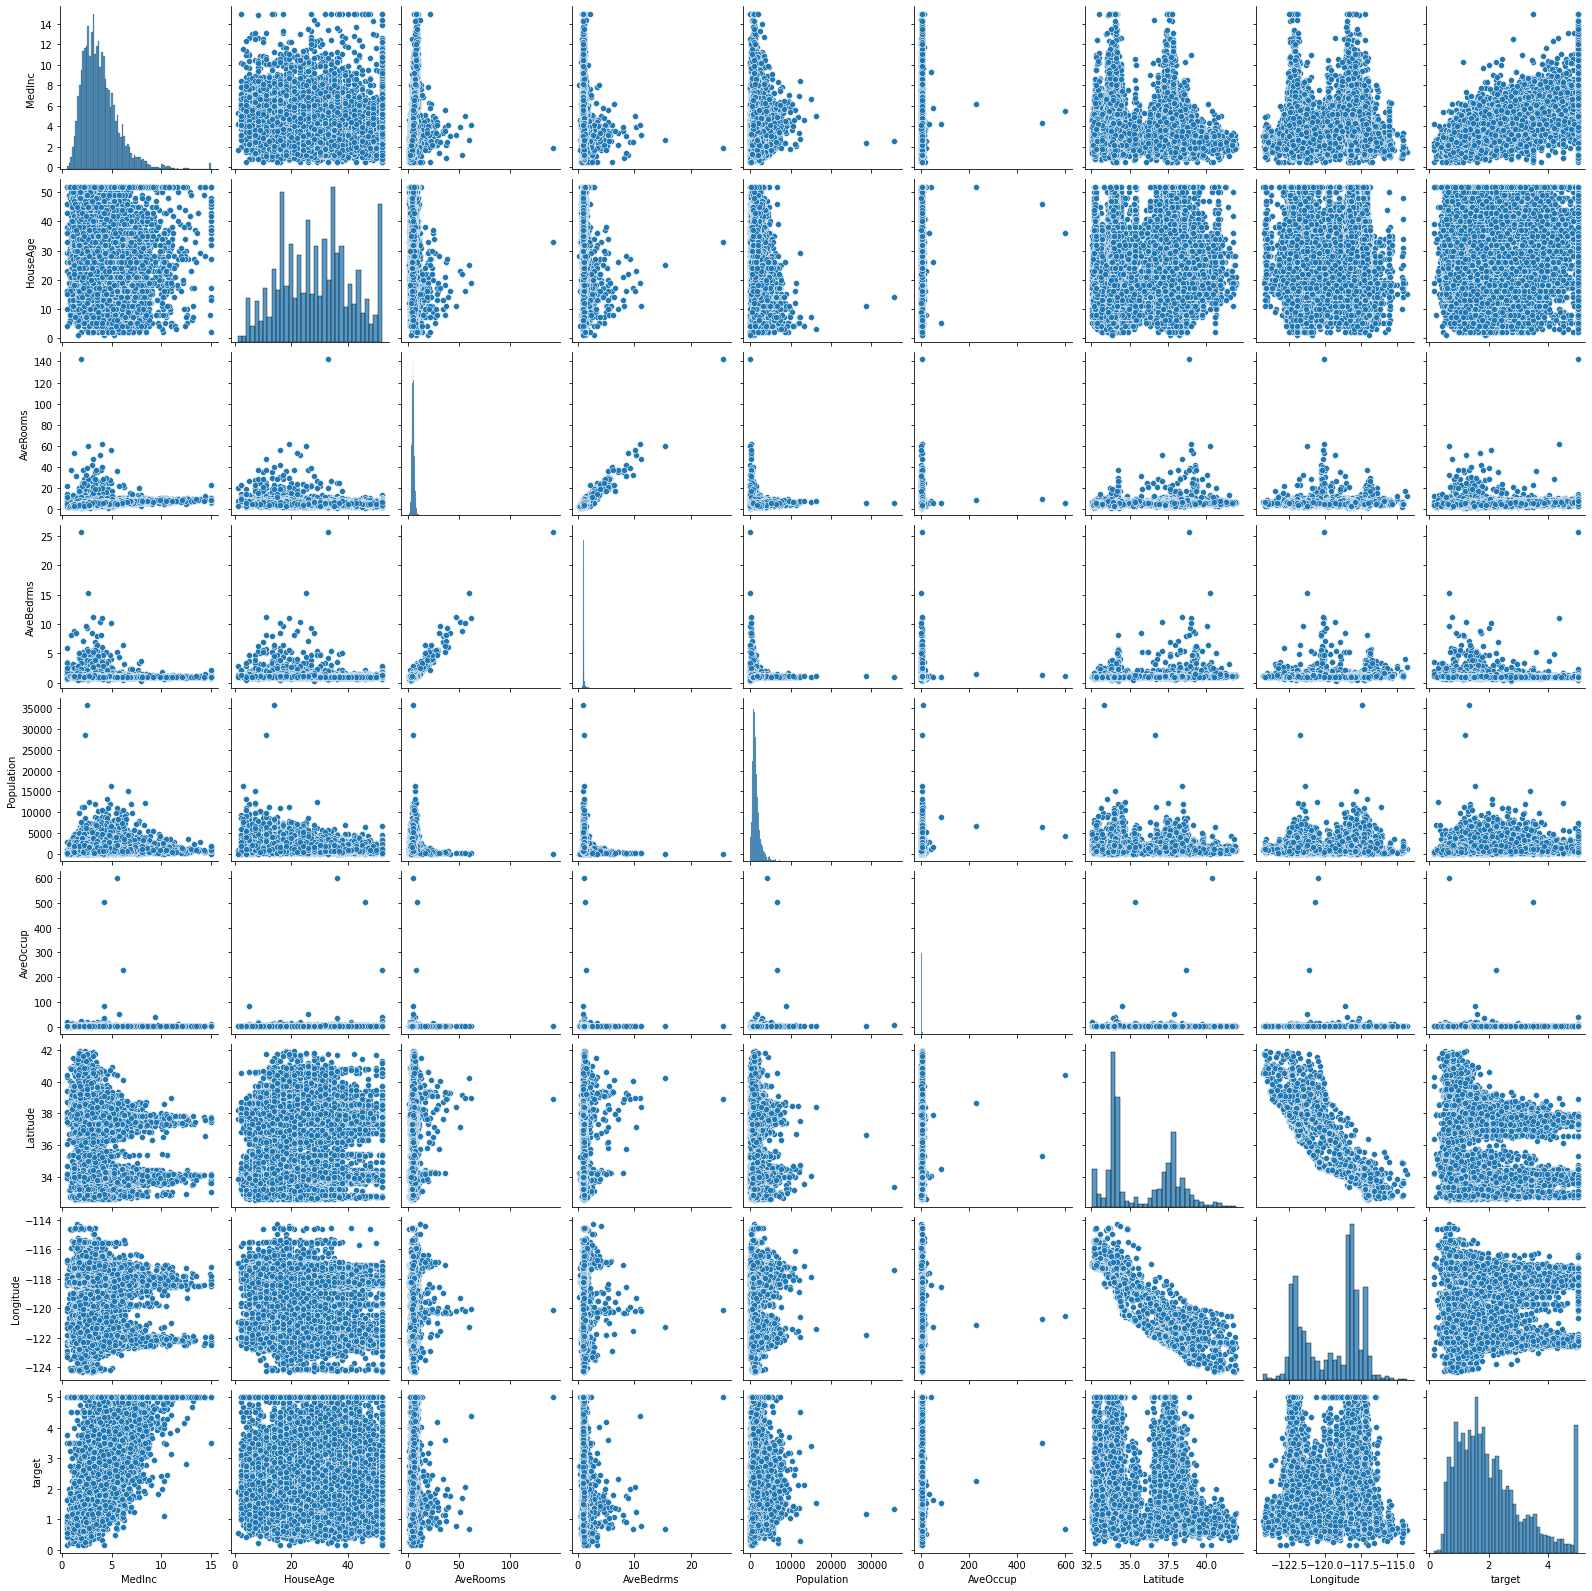

In [28]:
# Look at the pairplot
sns.pairplot(data=df_train)

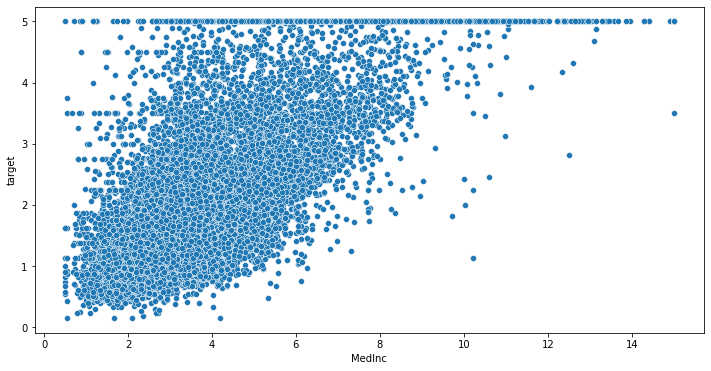

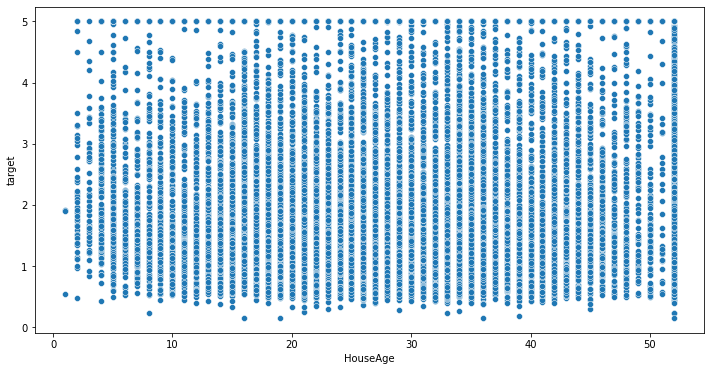

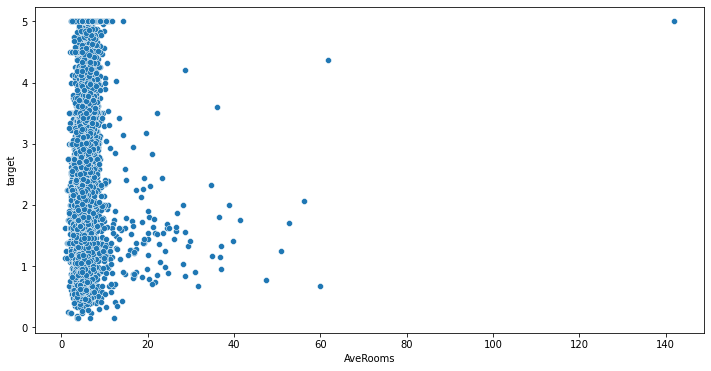

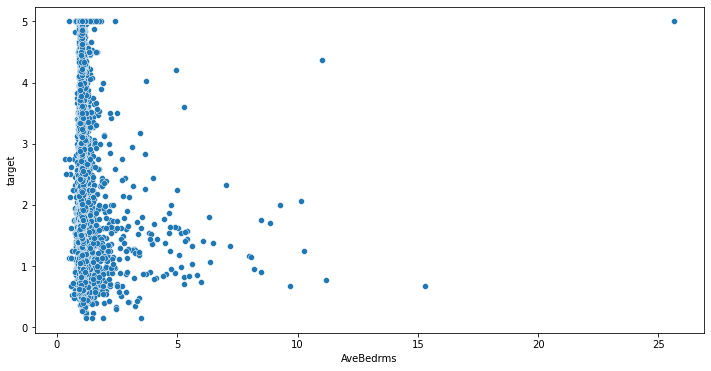

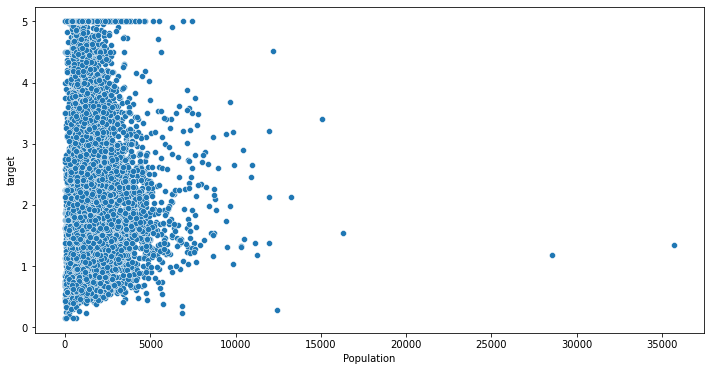

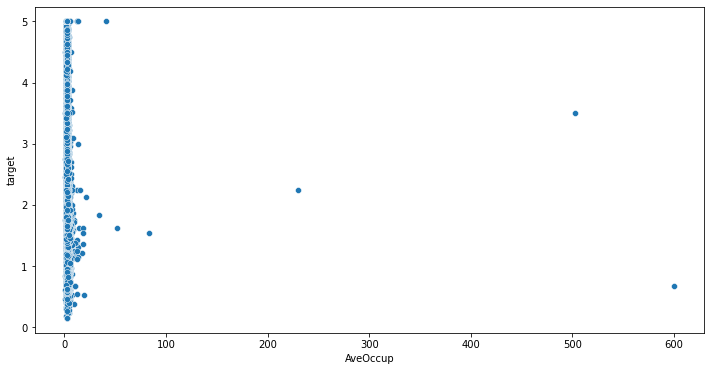

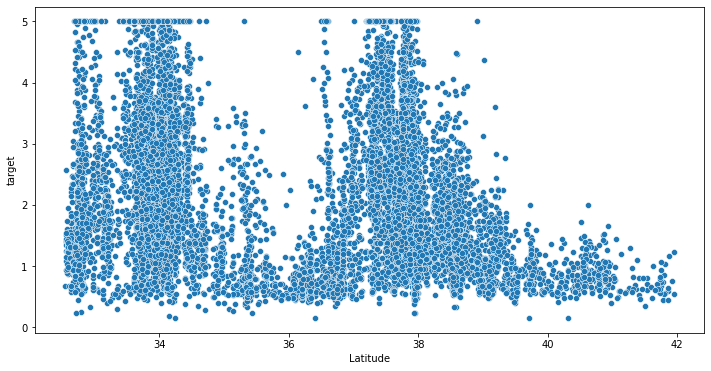

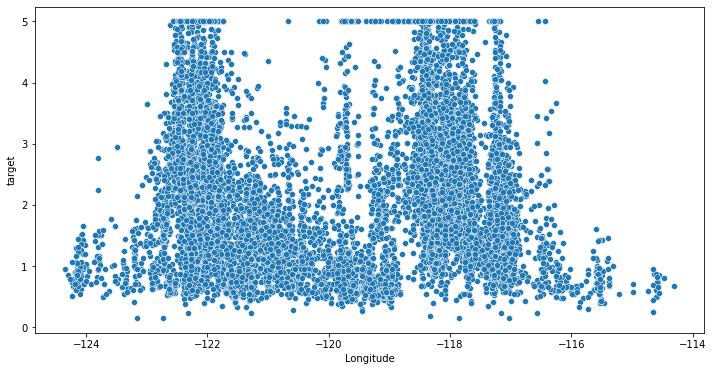

In [37]:
for column in df_train.iloc[:,:-1].columns:
    sns.scatterplot(x=column, y='target', data=df_train)
    plt.show()

# Linear Regression with scikit-learn

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
# Create the model
m = LinearRegression()

In [107]:
# Decide which feature to use
X_train = df_train[['MedInc', 'AveBedrms']]

In [108]:
# Fit the model
m.fit(X_train, y_train)

LinearRegression()

## Evaluate/Optimize the model

- What kind of evaluation metrics can we use?
- You should do cross-validation!

In [109]:
from sklearn.model_selection import cross_validate

In [110]:
cross_validation = cross_validate(m,
              X_train,
              y_train,
              cv=10,
              return_train_score=True)

In [111]:
cross_validation['train_score'].mean()

0.47157678650387347

In [112]:
cross_validation['test_score'].mean()

0.47094270412721634

In [113]:
m.score(X_train, y_train)

0.47155380462456475

**R-squared**

$$
R^2 = 1 - \frac{SSR}{SST} = 
      1- \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \overline{y})2}
$$

where $\hat{y_i}$ is the **prediction** of the model for observation i, <br>
and $\overline{y}$ is the **sample mean** of y


Can be interpreted as the **ratio of variance in y explained by the model**.

In [114]:
# Make predictions for the training data
y_pred = m.predict(X_train)

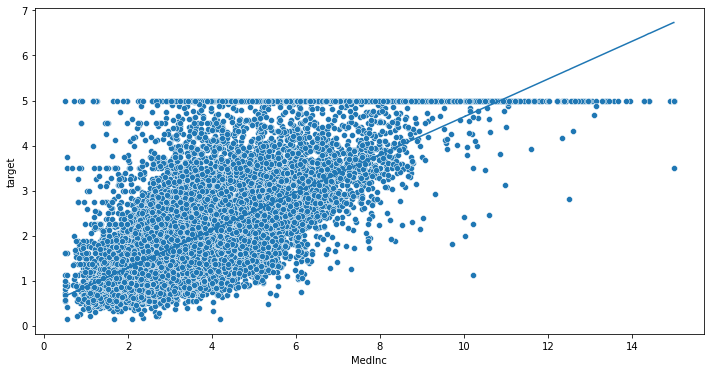

In [115]:
# Plot the training data and the predictions for the training data
sns.lineplot(x=X_train['MedInc'], y=y_pred)
sns.scatterplot(x='MedInc', y='target', data=df_train)

In [116]:
m.intercept_

# Interpretation
# When the median income is 0 and the number of average bedrooms in a district is 0, then
# our model predicts the ln(median house value) to be 0.44

0.4399187451599682

In [117]:
m.coef_

array([0.41898548, 0.00748085])

In [118]:
# Interpretation:

# If there is an increase in the ln(Median Income (in USD)) of 1, on
# average, the ln(Median house value in USD) will be 0.42 higher, keeping the number
# of average bedrooms constant

## EDA

- Task for the rest of the day

## Feature Engineering

- You can start with this today using the methods you already know
- Tomorrow you have an additional lecture on feature engineering

## Fit the model